In [26]:
# Connecting the Python Code with the google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


STEP 1: Load and Preview Data

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files for Users, Transactions, and Products
users = pd.read_csv('/content/drive/MyDrive/Fetch_Rui Pan/USER_TAKEHOME.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Fetch_Rui Pan/TRANSACTION_TAKEHOME.csv')
products = pd.read_csv('/content/drive/MyDrive/Fetch_Rui Pan/PRODUCTS_TAKEHOME.csv')

# Preview the first few rows of each dataset to understand the structure
print("Users Table:")
print(users.head())
print("Transactions Table:")
print(transactions.head())
print("Products Table:")
print(products.head())

Users Table:
                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  BIRTH_DATE STATE LANGUAGE  GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
1  2001-09-24 04:00:00.000 Z    PA       en  female  
2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
3                        NaN    NC       en     NaN  
4  1972-03-19 00:00:00.000 Z    PA       en  female  
Transactions Table:
                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99     2024/8/21   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3     2024/7/20   
2  00017e0a-7851-42fb-bfab-0baa96e23586     2024/8/18   
3  000239aa-3478-453d-801e-66a82e39c8af     2024/6/18   
4  00026b

STEP 2: Check the quality of data

In [28]:
# 2. Check for missing values in each table to understand data quality issues
print("Missing values in Users table:")
print(users.isnull().sum())

print("Missing values in Transactions table:")
print(transactions.isnull().sum())

print("Missing values in Products table:")
print(products.isnull().sum())

Missing values in Users table:
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64
Missing values in Transactions table:
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64
Missing values in Products table:
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


In [29]:
# Check for duplicates
print("Duplicate Rows:")
print("Users:", users.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())
print("Products:", products.duplicated().sum())


Duplicate Rows:
Users: 0
Transactions: 171
Products: 372552


In [30]:
# Explore challenging fields (e.g., encoded or unclear fields)
print("Sample Users Data:")
print(users.head())


Sample Users Data:
                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  BIRTH_DATE STATE LANGUAGE  GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
1  2001-09-24 04:00:00.000 Z    PA       en  female  
2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
3                        NaN    NC       en     NaN  
4  1972-03-19 00:00:00.000 Z    PA       en  female  


In [31]:
# 3. Clean the Users table
# Remove rows where BIRTH_DATE is missing
users_cleaned = users.dropna(subset=['BIRTH_DATE'])

# Replace missing STATE values with the mode using .loc[] to avoid SettingWithCopyWarning
users_cleaned.loc[:, 'STATE'] = users_cleaned['STATE'].fillna(users_cleaned['STATE'].mode()[0])

# Replace missing LANGUAGE and GENDER values with 'Unknown' using .loc[]
users_cleaned.loc[:, 'LANGUAGE'] = users_cleaned['LANGUAGE'].fillna('Unknown')
users_cleaned.loc[:, 'GENDER'] = users_cleaned['GENDER'].fillna('Unknown')

# Ensure the dates are formatted correctly, removing milliseconds and timezones using .loc[]
users_cleaned.loc[:, 'CREATED_DATE'] = pd.to_datetime(users_cleaned['CREATED_DATE'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
users_cleaned.loc[:, 'BIRTH_DATE'] = pd.to_datetime(users_cleaned['BIRTH_DATE'], errors='coerce').dt.strftime('%Y-%m-%d')



In [32]:
# 4. Clean the Transactions table
# Remove rows where BARCODE is missing
transactions_cleaned = transactions.dropna(subset=['BARCODE'])

# Ensure the dates are formatted correctly, removing milliseconds and timezones using .loc[]
transactions_cleaned.loc[:, 'PURCHASE_DATE'] = pd.to_datetime(transactions_cleaned['PURCHASE_DATE'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
transactions_cleaned.loc[:, 'SCAN_DATE'] = pd.to_datetime(transactions_cleaned['SCAN_DATE'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')

# Fix 'FINAL_QUANTITY' column, replacing 'zero' with 0 and converting to integer using .loc[]
transactions_cleaned.loc[:, 'FINAL_QUANTITY'] = transactions_cleaned['FINAL_QUANTITY'].replace('zero', 0)
transactions_cleaned.loc[:, 'FINAL_QUANTITY'] = pd.to_numeric(transactions_cleaned['FINAL_QUANTITY'], errors='coerce').fillna(0).astype(int)

# Fix 'FINAL_SALE' column, converting to float and filling missing values with 0.0 using .loc[]
transactions_cleaned.loc[:, 'FINAL_SALE'] = pd.to_numeric(transactions_cleaned['FINAL_SALE'], errors='coerce').fillna(0.0)

# Remove duplicates based on RECEIPT_ID in transactions
transactions_cleaned = transactions_cleaned.drop_duplicates(subset='RECEIPT_ID', keep='first')


In [33]:
# 5. Clean the Products table
# Fill missing category fields with 'Unknown' instead of deleting rows
products.loc[:, 'CATEGORY_1'] = products['CATEGORY_1'].fillna('Unknown')
products.loc[:, 'CATEGORY_2'] = products['CATEGORY_2'].fillna('Unknown')
products.loc[:, 'CATEGORY_3'] = products['CATEGORY_3'].fillna('Unknown')
products.loc[:, 'CATEGORY_4'] = products['CATEGORY_4'].fillna('Unknown')

# Fill missing MANUFACTURER and BRAND with 'Unknown' using .loc[]
products.loc[:, 'MANUFACTURER'] = products['MANUFACTURER'].fillna('Unknown')
products.loc[:, 'BRAND'] = products['BRAND'].fillna('Unknown')

# Only remove rows where BARCODE is missing, as it is critical for joining with transactions
products_cleaned = products.dropna(subset=['BARCODE'])

# Remove duplicate products based on BARCODE
products_cleaned = products_cleaned.drop_duplicates(subset='BARCODE', keep='first')



In [34]:
## 6. Export cleaned data to new CSV files
users_cleaned.to_csv('cleaned_users.csv', index=False, encoding='utf-8')
transactions_cleaned.to_csv('cleaned_transactions.csv', index=False, encoding='utf-8')
products_cleaned.to_csv('cleaned_products.csv', index=False, encoding='utf-8')



In [35]:
# 7. Optional: You can inspect the cleaned datasets
print("Users Cleaned:")
print(users_cleaned.head())
print("Transactions Cleaned:")
print(transactions_cleaned.head())
print("Products Cleaned:")
print(products_cleaned.head())


Users Cleaned:
                         ID         CREATED_DATE  BIRTH_DATE STATE LANGUAGE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54  2000-08-11    CA   es-419   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55  2001-09-24    PA       en   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18  1994-10-28    FL   es-419   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50  1972-03-19    PA       en   
5  5fe2b6f3ad416a1265c4ab68  2020-12-23 03:18:11  1999-10-27    NY       en   

   GENDER  
0  female  
1  female  
2  female  
4  female  
5  female  
Transactions Cleaned:
                             RECEIPT_ID        PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99  2024-08-21 00:00:00   
2  00017e0a-7851-42fb-bfab-0baa96e23586  2024-08-18 00:00:00   
3  000239aa-3478-453d-801e-66a82e39c8af  2024-06-18 00:00:00   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1  2024-07-04 00:00:00   
5  0002d8cd-1701-4cdd-a524-b70402e2dbc0  2024-06-24 00:00:00   

             SCAN_DATE STORE_NA

In [36]:
import pandas as pd

# Read the CSV file

# Drop rows where 'BARCODE' is missing
products_cleaned = products_cleaned.dropna(subset=['BARCODE'])

# Save the cleaned data to a new CSV file with UTF-8 encoding
products_cleaned.to_csv('cleaned_products.csv', index=False,encoding='utf-8')

# Save the file again as UTF-8 encoded
products.to_csv('cleaned_products_utf8.csv', index=False, encoding='utf-8')


In [37]:
# Read the UTF-8 CSV file
df = pd.read_csv('cleaned_products_utf8.csv')

# Output the number of rows in the CSV file
print("Number of rows in Users CSV file:", len(df))

Number of rows in Users CSV file: 845552


In [38]:
# Read the cleaned users CSV file
df_users = pd.read_csv('cleaned_users.csv')

# Output the number of rows in the users CSV file
print("Number of rows in Users CSV file:", len(df_users))

Number of rows in Users CSV file: 96325


In [39]:
# Read the cleaned transactions CSV file
df_t = pd.read_csv('cleaned_transactions.csv')

# Output the number of rows in the transactions CSV file
print("Number of rows in Users CSV file:", len(df_t))

Number of rows in Users CSV file: 21639


In [40]:
duplicates = transactions_cleaned[transactions_cleaned.duplicated(subset='RECEIPT_ID', keep=False)]
print("Number of duplicate primary key records:", len(duplicates))


Number of duplicate primary key records: 0


In [41]:
# Function to clean text by removing non-ASCII characters

def clean_text(text):
    if isinstance(text, str):

        return text.encode('ascii', 'ignore').decode('ascii')
    else:

        return text

# Apply the text cleaning function to transactions and products datasets

#users_cleaned = users_cleaned.applymap(clean_text)
transactions_cleaned = transactions_cleaned.applymap(clean_text)
products_cleaned = products_cleaned.applymap(clean_text)

# Remove any duplicate columns (just in case) in the products dataset

#users_cleaned.to_csv('cleaned_users.csv', index=False, encoding='utf-8')
transactions_cleaned.to_csv('cleaned_transactions.csv', index=False, encoding='utf-8')
products_cleaned.to_csv('cleaned_products.csv', index=False, encoding='utf-8')


<ipython-input-41-8006d9e072da>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions_cleaned = transactions_cleaned.applymap(clean_text)
<ipython-input-41-8006d9e072da>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  products_cleaned = products_cleaned.applymap(clean_text)


In [42]:
print(products_cleaned.head(5))


          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0    Unknown                                            Unknown   
1    Unknown                                            Unknown   
2    Unknown                           PLACEHOLDER MANUFACTURER   
3    Unknown                                  COLGATE-PALMOLIVE   
4    Unknown  MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...   

             BRAND       BARCODE  
0          Unknown  7.964940e+11  
1          Unknown  2.327801e+10  
2          ELECSOP  4.618180e

In [43]:
import pandas as pd

# Read the cleaned products CSV file
df = pd.read_csv('cleaned_products.csv')

# Remove duplicate columns, if any
df = df.loc[:, ~df.columns.duplicated()]

# Save the cleaned CSV file
df.to_csv('cleaned_file.csv', index=False)


In [54]:
top_5_brands = top_brands_receipts_21.groupby('BRAND')['RECEIPT_ID'].count().reset_index().sort_values(
    by='RECEIPT_ID', ascending=False).head(5)


In [55]:
print(top_brands_receipts_21.head())


                             RECEIPT_ID        PURCHASE_DATE  \
0  00729da3-2564-4616-a4ea-7426232d52e8  2024-08-30 00:00:00   
1  00ad12b5-a990-4f56-b7d8-78a506c36529  2024-08-18 00:00:00   
2  019520fd-f28b-42ff-a29e-d6bf4f5c4b7c  2024-08-19 00:00:00   
3  02c675f0-3d0c-49ae-aa18-9422bb9b1cda  2024-06-28 00:00:00   
4  04359032-f079-4fa3-b02d-0f97348b8f11  2024-08-29 00:00:00   

             SCAN_DATE     STORE_NAME                   USER_ID       BARCODE  \
0  2024-09-03 13:00:21  FAMILY DOLLAR  62e5a95ca6565cf0534c989c  3.400008e+10   
1  2024-08-18 16:22:58       7-ELEVEN  610a8541ca1fab5b417b5d33  4.000000e+10   
2  2024-08-19 11:19:59         MEIJER  646bdaa67a342372c857b958  4.125009e+10   
3  2024-06-28 09:59:19         PUBLIX  647281efa55bb77a0e26f586  7.203000e+10   
4  2024-08-30 17:33:49  FAMILY DOLLAR  6528a0a388a3a884364d94dc  7.920005e+10   

   FINAL_QUANTITY  FINAL_SALE                        ID         CREATED_DATE  \
0               1        0.00  62e5a95ca6565cf05

<ipython-input-58-fd7d0a148bd7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RECEIPT_ID', y='BRAND', data=top_5_brands, palette='Greens_d')


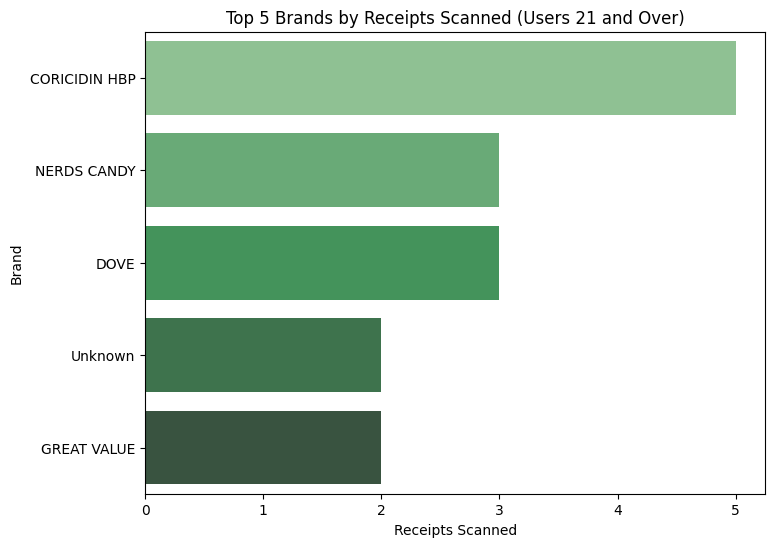

In [58]:
# Top 5 brands by receipts scanned
top_brands_receipts = transactions_cleaned.merge(users_cleaned, left_on='USER_ID', right_on='ID').merge(
    products_cleaned, on='BARCODE')

top_brands_receipts_21 = top_brands_receipts[
    (pd.to_datetime('today').year - pd.to_datetime(top_brands_receipts['BIRTH_DATE']).dt.year) >= 21
]

top_5_brands = top_brands_receipts_21.groupby('BRAND')['RECEIPT_ID'].count().reset_index().sort_values(
    by='RECEIPT_ID', ascending=False).head(5)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='RECEIPT_ID', y='BRAND', data=top_5_brands, palette='Greens_d')
plt.title('Top 5 Brands by Receipts Scanned (Users 21 and Over)')
plt.xlabel('Receipts Scanned')
plt.ylabel('Brand')
plt.show()


This bar chart shows that CORICIDIN HBP is the most scanned brand among users aged 21 and over, with 5 receipts scanned, followed by NERDS CANDY and DOVE. Interestingly, "Unknown" brands still appear, which indicates potential data quality issues that we need to address.

<ipython-input-49-1d002e3d38e5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_sales.loc[:, 'generation'] = pd.cut(
<ipython-input-49-1d002e3d38e5>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_gen = health_sales.groupby('generation')['FINAL_SALE'].sum().reset_index()
<ipython-input-49-1d002e3d38e5>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='generation', y='FINAL_SALE', data=sales

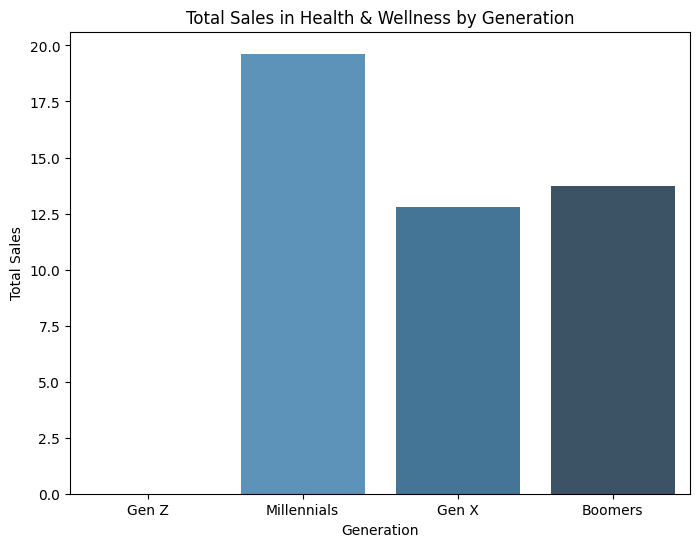

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sales by generation for Health & Wellness category
sales_by_generation = transactions_cleaned.merge(users_cleaned, left_on='USER_ID', right_on='ID').merge(
    products_cleaned, on='BARCODE')

# Filter for 'Health & Wellness' category
health_sales = sales_by_generation[sales_by_generation['CATEGORY_1'] == 'Health & Wellness']

health_sales.loc[:, 'generation'] = pd.cut(
    health_sales['BIRTH_DATE'].apply(lambda x: 2024 - pd.to_datetime(x).year),
    bins=[0, 24, 40, 56, 100],
    labels=['Gen Z', 'Millennials', 'Gen X', 'Boomers'],
    right=False
)

# Group by generation and calculate total sales
sales_gen = health_sales.groupby('generation')['FINAL_SALE'].sum().reset_index()

# Plotting the sales by generation
plt.figure(figsize=(8, 6))
sns.barplot(x='generation', y='FINAL_SALE', data=sales_gen, palette='Blues_d')
plt.title('Total Sales in Health & Wellness by Generation')
plt.ylabel('Total Sales')
plt.xlabel('Generation')
plt.show()


Millennials account for the highest sales in the Health & Wellness category, followed by Gen X and Boomers. Gen Z sales are noticeably low, indicating a possible under-engagement with younger users in this category.


<ipython-input-62-37fb64d38641>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FINAL_SALE', y='BRAND', data=top_5_sales_brands, palette='Blues_d')


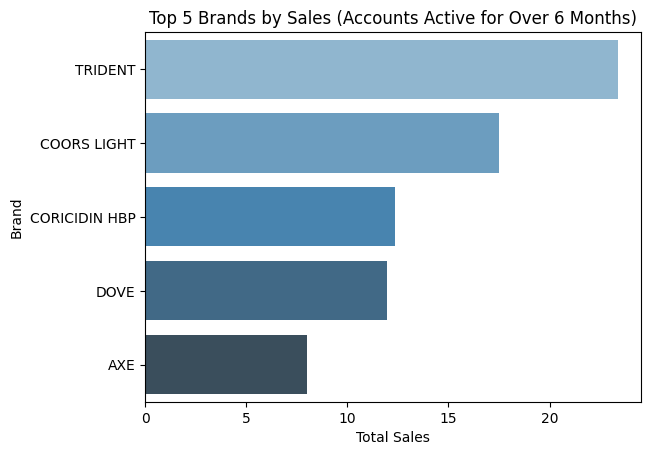

In [62]:
# Convert the 'CREATED_DATE' column to datetime
top_brands_sales['CREATED_DATE'] = pd.to_datetime(top_brands_sales['CREATED_DATE'], errors='coerce')

# Define six months ago
six_months_ago = pd.to_datetime('today') - pd.DateOffset(months=6)

# Now you can safely filter the data
top_brands_sales_6m = top_brands_sales[top_brands_sales['CREATED_DATE'] < six_months_ago]

# Group and summarize
top_5_sales_brands = top_brands_sales_6m.groupby('BRAND')['FINAL_SALE'].sum().reset_index().sort_values(
    by='FINAL_SALE', ascending=False).head(5)

# Plot the results
sns.barplot(x='FINAL_SALE', y='BRAND', data=top_5_sales_brands, palette='Blues_d')
plt.title('Top 5 Brands by Sales (Accounts Active for Over 6 Months)')
plt.xlabel('Total Sales')
plt.ylabel('Brand')
plt.show()



For users who have been active for over 6 months, TRIDENT leads in sales with a total of 23.36, followed by COORS LIGHT and CORICIDIN HBP. This highlights the importance of TRIDENT for long-term users and suggests this brand's ability to drive loyalty and repeat purchases.

Index(['BRAND', 'FINAL_SALE'], dtype='object')


<ipython-input-65-1a49da53a745>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FINAL_SALE', y='BRAND', data=top_dips_salsa_brand, palette='Blues_d')


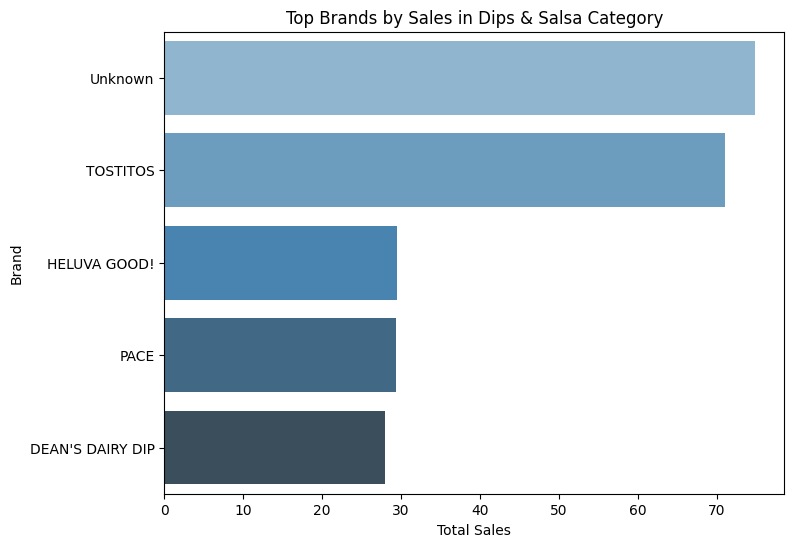

In [65]:
# Check the column names to ensure correct reference
print(top_dips_salsa_brand.columns)

# Assuming 'FINAL_SALE' is the correct column, adjust the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='FINAL_SALE', y='BRAND', data=top_dips_salsa_brand, palette='Blues_d')
plt.title('Top Brands by Sales in Dips & Salsa Category')
plt.xlabel('Total Sales')
plt.ylabel('Brand')
plt.show()


The top brand in the Dips & Salsa category is TOSTITOS, with 71.11 in total sales. However, the presence of an "Unknown" brand with significant sales again indicates potential data entry issues.